<style>
    p { color: red; }
</style>

<hr style="height:4px; border:none; color:black; background-color:black;">

### HTML

In [1]:
%%HTML
<style>
  div.prompt {display:none}
  li {color:black; font-size:large; line-height: 150%;}
  p {color:black; font-size:large; line-height: 150%;}
  p.k {color:black; font-size:110%; font-family: Consolas, monaco, monospace;}
  ul {list-style-type: none;}
</style>

### SYSTEM PATH

In [2]:
import sys, os
print("\nSYSTEM PATH BEFORE\n", sys.path)
path_extend = os.path.abspath('./lib')
if path_extend not in sys.path:
    sys.path.insert(0, path_extend)
print("\nSYSTEM PATH AFTER\n", sys.path)


SYSTEM PATH BEFORE
 ['/home/kurt/work/gps-satellites/jupyter', '/home/kurt/anaconda3/lib/python38.zip', '/home/kurt/anaconda3/lib/python3.8', '/home/kurt/anaconda3/lib/python3.8/lib-dynload', '', '/home/kurt/anaconda3/lib/python3.8/site-packages', '/home/kurt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/kurt/.ipython']

SYSTEM PATH AFTER
 ['/home/kurt/work/gps-satellites/jupyter/lib', '/home/kurt/work/gps-satellites/jupyter', '/home/kurt/anaconda3/lib/python38.zip', '/home/kurt/anaconda3/lib/python3.8', '/home/kurt/anaconda3/lib/python3.8/lib-dynload', '', '/home/kurt/anaconda3/lib/python3.8/site-packages', '/home/kurt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/kurt/.ipython']


### CURRENT WORKING DIRECTORY

In [3]:
import classes

util = classes.util()
util.getCwd()


Current Working Directory is /home/kurt/work/gps-satellites/jupyter


### IMPORTS

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets

<hr style="height:4px; border:none; color:black; background-color:black;">

<h1><center><u>Objects in Earth Orbit</u></center></h1>

1. [Project Description](#pc1)  
    1.1 [Background](#pc1)  
    1.2 [Project Capabilities](#pc2)  
    1.3 [Questions That Can Be Answered Using These Capabilities](#pc3)  
    <br>
2. [Python Classes](#cl1)  
    2.1 [Class to Download Orbital Data and Transform to a Dataframe](#cl1)  
    2.2 [Class to Display Plots of the Orbital Data](#cl2)  
    <br>
3. [Activity](#ac1)  
    3.1 [Download Measurements](#ac1)  
    3.2 [Example of the GPS Satellite Data](#ac2)  
    3.3 [An Interactive Plot of Orbital Data](#ac3)  

<a id="pc1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 1. Project Description
## 1.1 Background

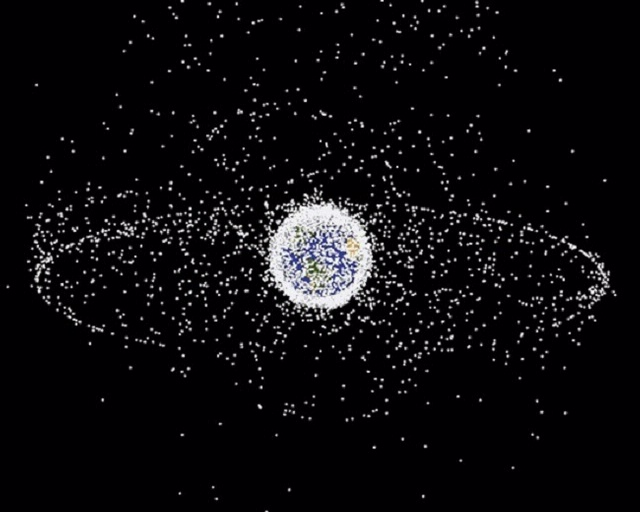

In [5]:
from IPython import display 
display.Image("data/7423_640.jpg")

### There are many types of objects in orbit around the earth:

* Communication satellites
* GPS satellites
* Weather satellites
* Scientific satellites
* Space debris
* The International Space Station
* The Hubble Space Telescope

> [What Is An Orbit?](https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-orbit-58.html)

The positions of these objects in orbit are being monitored continuously using ground monitor stations and near space radar. Current and historical information related to orbitting objects is mostly public and available from certain websites, for example:

> [NORAD Current Orbital Data](https://celestrak.com/NORAD/elements/)  
> [NORAD Archives](https://celestrak.com/NORAD/archives/)

Sometimes a satellite must be repositioned. For example, GPS satellites must maintain positions relative to each other. 

> [Repositioning Satellites](https://www.satsig.net/orbit-research/geo-orbit-repositioning.htm)

The following link shows that satellite positions are publically available and can be received in real-time:

> [Real-Time Satellite Locations](https://in-the-sky.org/satmap_worldmap.php)

### GPS Satellites

There are currently 30 satellites in the GPS constellation contained in 6 orbital planes. Each GPS satellite orbits twice per 24 hour day around the earth. The goal of the GPS constellation is to make sure that at least 4 GPS satellites are covering every point on the earth at any one time.

The current GPS satellite data is presented in CSV format by the URL
> https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV

### Chinese Anti-Satellite Missile Test Debris

There also exist much space debris (for various reasons) orbiting the earth. For example, a large pattern of space debris was created in 2007 when the Chinese intentionally destroyed its own satellite. The locations of satellites and space debris are mostly public information. 

The current location of the Chinese debris is available at
> https://celestrak.com/NORAD/elements/gp.php?GROUP=1999-025&FORMAT=csv"

<a id="pc2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 1.2 Project Capabilities

<p style="color:green; font-style:italic; font-weight:bold;">This project proposes to monitor GPS satellite locations and their positions in space relative to each other and to space debris. The goal of this project is to determine how close each GPS satellite tracks along its intended orbit and also how close space debris might come to our essential GPS fleet.</p>

### Accumulate Orbital Data
This project shall accumulate daily measurements of GPS and Space Debris positions at specific times. Orbital data is recorded in the format called Two-Line Element Set (TLE). The fields of each record specify time, position and trajectory along the elliptical orbit. Some websites are capable of converting the TLE records into CSV format containing the same information.

The TLE format is concise and useful to the scientific community. If a line is drawn from the center of the earth to the orbital object, it determines a latitude and longitude on the surface of the earth. It also determines an altitude. The TLE data will be converted to a more user friendly latitude/longitude/altitude.
### Predict Measurement to Future Time
Based on accumulated measurements, the project shall be capable of predicting the expected position of the orbital object at some time in the near future. For example, determine the expected position of a particular GPS satellite at each hour for the next 12 hours.
### Determine Distance Between Orbital Objects
Based on accumulated measurements, the project shall be capable of predicting the distance between two orbital objects at some time in the near future. For example, determine the estimated separation between a particular GPS satellite and a particular space debris at a certain time.

<a id="pc3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

<a id="pc2"></a>
## 1.3 Questions That Can Be Answered Using These Capabilities 
<a id="pc2"></a>
* Is a GPS satellite moving outside of its designated orbit?
* Is a GPS satellite too close or too far from adjacent satellites in its orbit?
* Predict if it is likely that a GPS satellite will be repositioned by the Space Operations Squadron within the next 10 days.
* For a particular GPS satellite, what are the 100 closest debris objects at the current time?
* Predict the likelihood of space debris entering a danger zone around a GPS satellite.
* Estimate the probability that a particular debris object is associated with a particular debris cloud
* Based on the kinetic energy of a debris object, when is it likely that the debris object will enter the earth's atmosphere?
* What is the likelihood that a space debris object or a retired satellite will reach the earth? When and where?

<a id="cl1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 2. Python Classes
## 2.1 Class to Download Orbital Data and Transform to a Dataframe

In [6]:
import pycurl, csv
from io import BytesIO

"""
CsvToDataFrame
"""

class CsvToDataFrame(object):
    
    csv_file = 'data/Artworks.csv'

    def __init__(self, url, csvFile):
        self.url = url
        self.csvFile = csvFile
        pass

    def downloadCsvFile(self):
        # buffer to receive the data
        buffer = BytesIO()

        # read into the buffer
        c = pycurl.Curl()
        c.setopt(c.URL, self.url)
        c.setopt(c.WRITEDATA, buffer)
        c.perform()
        c.close()

        # obtain the content
        content = buffer.getvalue()

        # write to the CSV file
        with open(self.csvFile, 'w') as f:
            print(content.decode('iso-8859-1'), file=f)

        # show result
        fullPath = os.path.abspath(csvFile)
        file = open(fullPath)
        reader = csv.reader(file)
        numberRecords = len(list(reader))
        print(f'\n{numberRecords} records have been downloaded to the file: {fullPath}')
        
    def remove_spaces(self, colname):
        return colname.strip().replace(' ','_')

    def convertToDataFrame(self):
        self.orig = pd.read_csv(self.csvFile)
        self.orig.rename(columns = self.remove_spaces, inplace=True)

    def transformColumns(self):
        # extract date/time column
        self.df = self.orig.assign(
            date_time = lambda this : this.EPOCH.str[0:16].str.replace("T", " "))

        # extract the PRN
        self.df["PRN"] = (
            self.df["OBJECT_NAME"].str.replace(".*PRN", "PRN", regex=True)
                                  .str.replace("\).*", "", regex=True)) 

        # select the columns of interest
        self.df = self.df.loc[:, ['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER', 'RA_OF_ASC_NODE']]

        # sort the columns by date and time
        self.df.sort_values(by=['date_time'], ascending=True, inplace=True)
        
    def text(self):
        print(f'Index is:\n{gps.df.index}',
              f'Columns are:\n{gps.df.columns}',
              f'Values are:\n{gps.df.values[0:3]}', sep='\n\n')

<a id="cl2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.2 Class to Display Plots of the Orbital Data

In [7]:

"""
Plotting
"""
class Plotting(object):
    
    linestyles = ['-', '--', '-.', ':', ':o']

    def __init__(self):
        pass

    def plotReset(self):
        plt.clf # clear figure
        plt.cla # clear axes
        plt.figure(figsize=(15,15)) # this also clears the previous plot

    def plotScatter(self, xColumn, yColumn, dataframe, color=None):
        if False: plt.scatter(env[xColumn], env[yColumn], alpha=1.0, zorder=2)
        if False: plt.plot(env[xColumn], env[yColumn], linestyle='dotted', alpha=0.8, zorder=1)
        plt.plot(dataframe[xColumn], dataframe[yColumn], 'o', alpha=1.0, color=color)

    def plotFormats(self, title, xLabel, yLabel, legend, 
                    xLim = (None,None), 
                    yLim = (None,None),
                    xTicks = (None,None,None), 
                    yTicks = (None,None,None)):
        plt.xlabel(xLabel, fontsize=15, color='darkblue')
        plt.ylabel(yLabel, fontsize=15, color='darkblue')
        plt.xlim(xLim[0], xLim[1])
        plt.ylim(yLim[0], yLim[1])
        plt.title(title, fontsize=15, color='darkblue');
        plt.grid(True)
        plt.legend(legend[0], loc=legend[1])
        plt.xticks(fontsize=14, rotation=45)
        plt.yticks(fontsize=14, rotation=45)
        if xTicks[0] != None:
            plt.xticks(np.arange(xTicks[0], xTicks[1], step=xTicks[2]))
        if yTicks[0] != None:
            plt.yticks(np.arange(yTicks[0], yTicks[1], step=yTicks[2]))
        return
    
    def labelPoints(self, df):
        for i in df.index:
            plt.text(df['RA_OF_ASC_NODE'][i] + 1.5,    # X location
                     df['ARG_OF_PERICENTER'][i] + 1.5, # Y location
                     df['PRN'][i] + '\n' +             # text
                     df['date_time'][i][5:].replace('-','/'),
                     horizontalalignment='left')

    def showLabels(self, df):  
        for i in df.index:
            print(f"{df['RA_OF_ASC_NODE'][i]:>10}   "
                  f"{df['ARG_OF_PERICENTER'][i]:>10}   "
                  f"{df['PRN'][i]:>10}")
 

<a id="ac1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 3. Activity
## 3.1 Download Measurements

### Download GPS Satelite Data

In [8]:
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV"
csvFile = 'data/gps-today.csv'
gps = CsvToDataFrame(url, csvFile)
gps.downloadCsvFile()
gps.convertToDataFrame()
gps.transformColumns()


32 records have been downloaded to the file: /home/kurt/work/gps-satellites/jupyter/data/gps-today.csv


### Download Chinese Anti-Satellite Missile Test Debris

In [9]:
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=1999-025&FORMAT=csv"
csvFile = 'data/debris-today.csv'
debris = CsvToDataFrame(url, csvFile)
debris.downloadCsvFile()
debris.convertToDataFrame()
debris.transformColumns()


2626 records have been downloaded to the file: /home/kurt/work/gps-satellites/jupyter/data/debris-today.csv


### Download Space Stations Including The International Space Station

In [10]:
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=stations&FORMAT=csv"
csvFile = 'data/iss-today.csv'
iss = CsvToDataFrame(url, csvFile)
iss.downloadCsvFile()
iss.convertToDataFrame()
iss.transformColumns()

zarya = iss.df.loc[iss.df['OBJECT_NAME'].str.contains("ISS") &
                   iss.df['OBJECT_NAME'].str.contains("ZARYA")]
zarya


70 records have been downloaded to the file: /home/kurt/work/gps-satellites/jupyter/data/iss-today.csv


,date_time,OBJECT_NAME,PRN,ARG_OF_PERICENTER,RA_OF_ASC_NODE
0,2021-03-01 16:36,ISS (ZARYA),ISS (ZARYA,63.5845,154.4064


<a id="ac2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 3.2 Example of the GPS Satellite Data

In [11]:
gps.df.iloc[:,:]

,date_time,OBJECT_NAME,PRN,ARG_OF_PERICENTER,RA_OF_ASC_NODE
23,2021-02-23 02:10,GPS BIIF-9 (PRN 26),PRN 26,13.4005,284.5302
18,2021-02-25 04:55,GPS BIIF-4 (PRN 27),PRN 27,32.0490,346.7920
22,2021-02-26 22:37,GPS BIIF-8 (PRN 03),PRN 03,45.0125,106.7685
16,2021-02-27 02:24,GPS BIIF-2 (PRN 01),PRN 01,46.0343,47.2678
19,2021-02-27 16:45,GPS BIIF-5 (PRN 30),PRN 30,199.7200,228.2848
10,2021-02-27 22:14,GPS BIIRM-3 (PRN 12),PRN 12,66.9206,290.7936
20,2021-02-27 23:24,GPS BIIF-6 (PRN 06),PRN 06,296.8310,46.7606
11,2021-02-28 05:50,GPS BIIRM-4 (PRN 15),PRN 15,54.9842,160.1938
14,2021-02-28 06:12,GPS BIIRM-8 (PRN 05),PRN 05,48.9752,104.6723
12,2021-02-28 07:49,GPS BIIRM-5 (PRN 29),PRN 29,127.3233,350.8184


### And the label placed on each plot of a GPS satellite:

In [12]:
cls = Plotting()
cls.showLabels(gps.df)


  284.5302      13.4005       PRN 26
   346.792       32.049       PRN 27
  106.7685      45.0125       PRN 03
   47.2678      46.0343       PRN 01
  228.2848       199.72       PRN 30
  290.7936      66.9206       PRN 12
   46.7606      296.831       PRN 06
  160.1938      54.9842       PRN 15
  104.6723      48.9752       PRN 05
  350.8184     127.3233       PRN 29
   42.5581     292.0028       PRN 21
  291.8531      36.7965       PRN 16
  166.2832     223.1003       PRN 32
  101.1893     300.1872       PRN 22
  352.7046     102.5783       PRN 19
  165.7229     106.2293       PRN 09
  350.1033     269.7105       PRN 17
  105.2106     150.6073       PRN 23
   42.5043     271.6603       PRN 02
  222.7781      41.0767       PRN 24
  228.1288      13.0786       PRN 31
  227.1663     225.9469       PRN 07
   174.134      56.8727       PRN 13
   47.9329     184.8614       PRN 18
  286.5947      53.4766       PRN 25
  345.6854     357.0774       PRN 08
  106.5081     213.6456       PRN 10
 

<a id="ac3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 3.3 An Interactive Plot of Orbital Data

In [13]:
s1 = widgets.Checkbox(value=True, description='GPS Satellites', disabled=False, indent=False)
s2 = widgets.Checkbox(value=True, description='Space Stations', disabled=False, indent=False)
s3 = widgets.Checkbox(value=False, description='Space Debris', disabled=False, indent=False)
s4 = widgets.Checkbox(value=True, description='International Space Station', disabled=False, indent=False)
s0 = widgets.Checkbox(value=True, description='SHOW ALL LABELS', disabled=False, indent=False)

ui = widgets.HBox([ s1, s2, s3, s4, s0 ]) 

def checkBox(check1, check2, check3, check4, check0):        
    title = "\nObjects in Earth Orbit\n"
    xLabel = "Azimuth (degrees)\n"
    yLabel = "Elevation (degrees)\n"
    legends = []
  
    p = Plotting()
    p.plotReset()
    
    if check1:
        legends.append("GPS Satellite");
        p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', gps.df.loc[:,:], color='Green')
    if check2:
        legends.append("Space Station");
        p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', iss.df.loc[:,:], color='Purple')
    if check3:
        legends.append("Space Debris");
        p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', debris.df.loc[:,:], color='red')
    if check4:
        legends.append("The International Space Station");
        p.plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', zarya.loc[:,:], color='red')
        
    legend = (legends, 'upper left')
    p.plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
    if check0: p.labelPoints(gps.df.loc[:,:])
    plt.axhline(y=180, color='r', linestyle='--')
    plt.axvline(x=180, color='r', linestyle='--')
    plt.show()
    
print(f'''


===============================
 SELECT OBJECTS IN EARTH ORBIT
===============================
''')

interact(
    checkBox,
    check1=s1,
    check2=s2,
    check3=s3,
    check4=s4,
    check0=s0,
    );




 SELECT OBJECTS IN EARTH ORBIT



interactive(children=(Checkbox(value=True, description='GPS Satellites', indent=False), Checkbox(value=True, d…

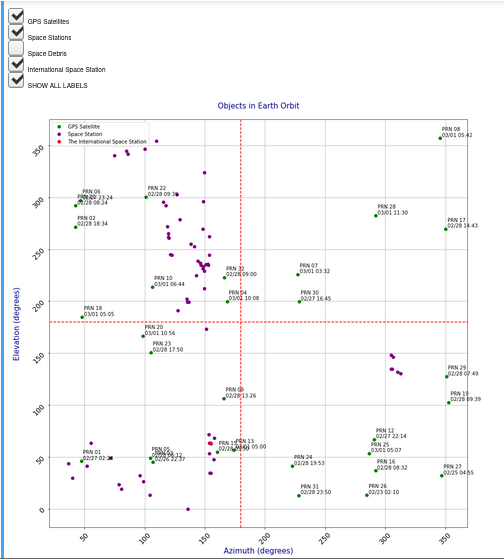

In [14]:
display.Image("data/sat.png", width=400, height=400)